100%|██████████| 26.4M/26.4M [00:01<00:00, 15.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 269kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.07MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.6MB/s]


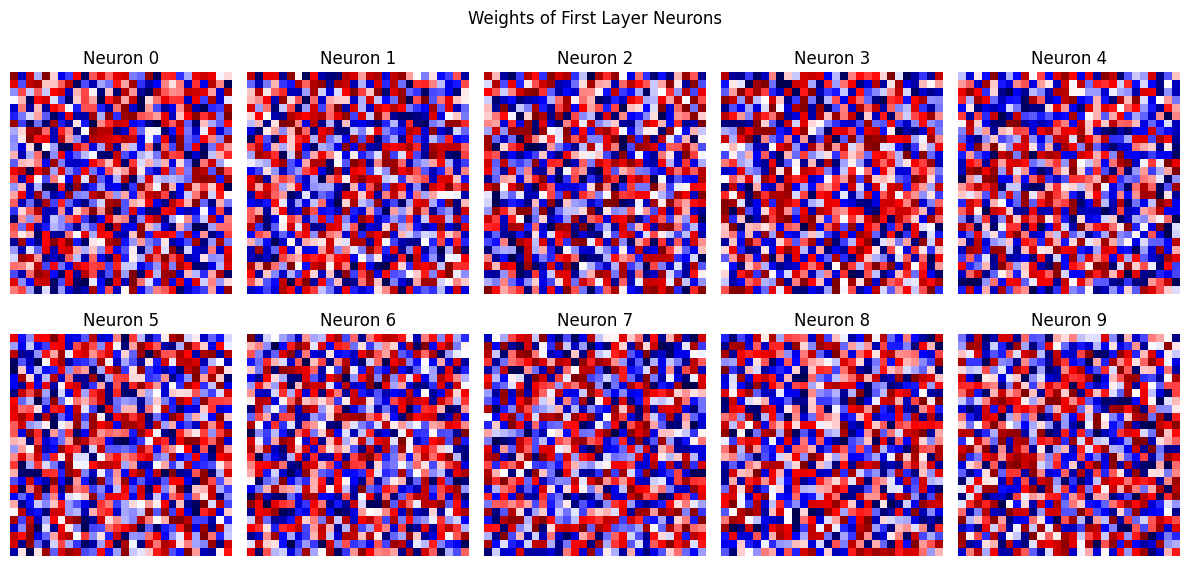

In [1]:
import torchvision
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

#Define transformations
transform = transforms.Compose([transforms.ToTensor()])

#Load training data
train_dataset=torchvision.datasets.FashionMNIST(
    root='/data',train=True,download=True,transform=transform
)

#Load testing data
test_dataset=torchvision.datasets.FashionMNIST(
    root='/data',train=False,download=True,transform=transform
)


train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=1,shuffle=False)
test_loader=torch.utils.data.DataLoader(test_dataset,batch_size=1,shuffle=False)

class FashionMNIST_MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten=nn.Flatten()
        self.fc1=nn.Linear(28*28,128)#input to hidden
        self.fc2=nn.Linear(128,10)#hidden to output

    def forward(self,x):
        x=self.flatten(x)
        x=F.relu(self.fc1(x))
        x=self.fc2(x) #x=self.fc2(F.relu(self.fc1(x)))
        return x
model =FashionMNIST_MLP().to("cuda" if torch.cuda.is_available() else "cpu")

weights = model.fc1.weight.data.clone().cpu()  # shape: [128, 784]



def plot_fc1_weights(weights, num_images=10):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        weight_img = weights[i].reshape(28, 28)
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(weight_img, cmap="seismic")
        plt.title(f"Neuron {i}")
        plt.axis("off")
    plt.suptitle("Weights of First Layer Neurons")
    plt.tight_layout()
    plt.show()
plot_fc1_weights(weights, num_images=10)

Color in Visualization	|               What It Means
Bright Red (positive)	|This pixel strongly activates the neuron if the input pixel is bright.
Dark Blue (negative)	|This pixel strongly inhibits the neuron if the input pixel is bright.
Near White (zero)	    |This pixel has little or no influence.
------------------------------------------------------------------------------------------------------
Let’s say one neuron’s weights look like a horizontal stripe across the middle:

That neuron might be detecting horizontal edges, like in a shirt or trouser waistline.

Another neuron might have high weights near the bottom corners:

It may be sensitive to the curve of a shoe sole.

----------------------------------------------------

When you visualize 5–10 neurons:
You’ll see that different neurons specialize in detecting different patterns.
These can be:
Vertical edges
Corners
Blob-like regions
Sometimes, even rough outlines of certain classes (e.g. a sneaker shape)
---------------------------------------------------------


A Real Analogy:
Think of each neuron as a pattern detector.

The weights form a template.

The neuron says: “If the input looks like this, I’ll activate.”